# Exploring a set of DICOM files

This notebook uses the pydicom library to read and explore a set of DICOM image data files, and demonstrates some of the best practices we recommend in the BENDER series.

In [1]:
import pydicom
from pydicom.data import get_testdata_files
import matplotlib.pyplot as plt

Read a set of DICOM files from the test data location built-into pydicom.

In [2]:
fpath = get_testdata_files("*.dcm")
len(fpath)
test_file = pydicom.dcmread(fpath[3])

Print metadata from the DICOM file - this is very important for medical images: beyond just image pixels/voxels, the metadata contains vital information about patient position, relation to physical dimensions, orientation and standards for acquisition, and even personal details about the patient. Ideally, these personally identifiable details must be anonymized. 

In [3]:
print(test_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.4.1.1.20040826185059.5457
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Big Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.3
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_363'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'OTHER']
(0008, 0012) Instance Creation Date              DA: '20040826'
(0008, 0013) Instance Creation Time              TM: '185434'
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.3
(0008, 0016) SOP Class UID      

Fortunately for us, this data is indeed anonymized: unless someone is really named "CompressedSamples^MR1". We then can list all the other metadata that can be read directly using the pydicom object API.

In [4]:
print(test_file.PatientName)

[x for x in dir(test_file) if x[:1] != "_" and x[0] == x[0].upper()]

CompressedSamples^MR1


['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionNumber',
 'AcquisitionTime',
 'BitsAllocated',
 'BitsStored',
 'Columns',
 'ContrastBolusAgent',
 'DeviceSerialNumber',
 'EchoNumbers',
 'EchoTime',
 'EchoTrainLength',
 'FlipAngle',
 'FrameOfReferenceUID',
 'HighBit',
 'ImageComments',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'ImagedNucleus',
 'ImagingFrequency',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceCreatorUID',
 'InstanceNumber',
 'InstitutionName',
 'LargestImagePixelValue',
 'Laterality',
 'MRAcquisitionType',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'NameOfPhysiciansReadingStudy',
 'NumberOfAverages',
 'OperatorsName',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientPosition',
 'PatientSex',
 'PatientSize',
 'PatientWeight',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'PositionReferenceIndicator',
 'ReferringPhysicianName',
 'RepetitionTime',
 'Rows',
 'SOPClas

Finally, the image data can be read using the 'PixelData' property.

In [5]:
image_data = test_file.pixel_array
type(image_data)

numpy.ndarray

And finally, we display the image data using matplotlib.

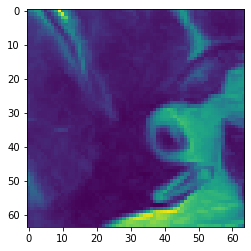

In [6]:
plt.imshow(image_data)

More details about these pixels can be found in the following properties:

In [10]:
print(test_file.SliceLocation)
print(test_file.SliceThickness)
print(test_file.ImageOrientationPatient)
print(test_file.ImagePositionPatient)
print(test_file.ImageType)
print(test_file.Modality)

0.0000
0.8000
[1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000]
[-83.9063, -91.2000, 6.6406]
['DERIVED', 'SECONDARY', 'OTHER']
MR
